<a href="https://colab.research.google.com/github/Lucas-Buk/Introducao-Ciencia-de-Dados/blob/master/Aula_1_Explora%C3%A7%C3%A3o_Olist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gitly

In [71]:
from gitly.colab.plot import GitlyPlotter

gitly = GitlyPlotter(renderer='github')

# Carregar os CSVs

In [72]:
import pandas as pd
import plotly.express as px

In [73]:
df_clientes = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro a Ciência de Dados/Datasets/olist_customers_dataset.csv')
df_geo = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro a Ciência de Dados/Datasets/olist_geolocation_dataset.csv', encoding='utf8')
df_compra_itens = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro a Ciência de Dados/Datasets/olist_order_items_dataset.csv')
df_compra_pagamentos = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro a Ciência de Dados/Datasets/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro a Ciência de Dados/Datasets/olist_order_reviews_dataset.csv')
df_compras = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro a Ciência de Dados/Datasets/olist_orders_dataset.csv')
df_produtos = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro a Ciência de Dados/Datasets/olist_products_dataset.csv')
df_vendedores = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro a Ciência de Dados/Datasets/olist_sellers_dataset.csv')

# Exploração dataset Clientes

In [74]:
df_clientes.shape

(99441, 5)

In [75]:
df_clientes.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [76]:
# Quantas cidades diferentes temos no dataset
print(f'Número de cidades diferentes: {len(df_clientes.customer_city.unique())}')

Número de cidades diferentes: 4119


In [77]:
# Quantas estados diferentes temos no dataset
print(f'Número de estados diferentes: {len(df_clientes.customer_state.unique())}')

Número de estados diferentes: 27


In [78]:
# Total de clientes
print(f'Número de clientes diferentes: {len(df_clientes.customer_unique_id.unique())}')

Número de clientes diferentes: 96096


In [79]:
# Total de clientes por cidade
data = df_clientes.groupby('customer_unique_id').first()
data.customer_city.value_counts()

sao paulo                 14971
rio de janeiro             6611
belo horizonte             2671
brasilia                   2066
curitiba                   1462
                          ...  
santa luzia do parua          1
itacurussa                    1
terra nova                    1
lagoa de sao francisco        1
santana do capivari           1
Name: customer_city, Length: 4118, dtype: int64

In [80]:
data.customer_city.value_counts().sum()

96096

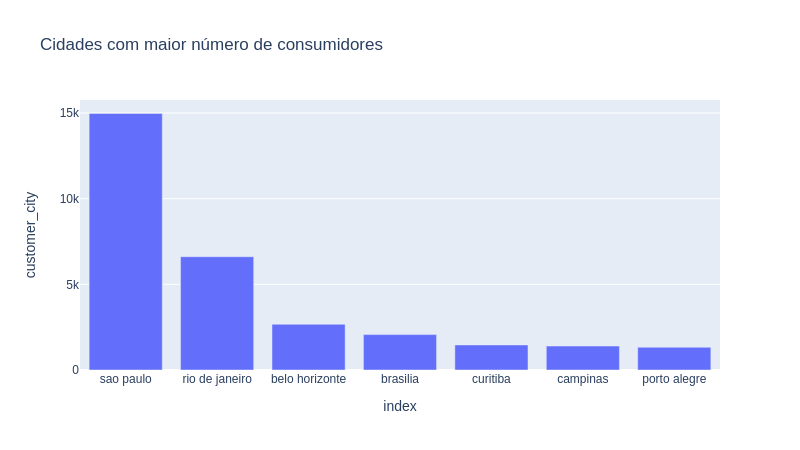

In [81]:
data = data.customer_city.value_counts().head(7).reset_index()

fig = px.bar(data, x='index', y='customer_city', title='Cidades com maior número de consumidores')
gitly.show(fig)

# Exploração dataset Itens

In [82]:
# Tamanho do dataset
df_compra_itens.shape

(112650, 7)

In [83]:
df_compra_itens.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [84]:
# Número de pedidos únicos
print(f'Número de pedidos: {len(df_compra_itens.order_id.unique())}')

Número de pedidos: 98666


In [85]:
# Número de produtos
print(f'Número de produtos: {len(df_compra_itens.product_id.unique())}')

Número de produtos: 32951


In [86]:
# Quantidade de vendedores
print(f'Número de vendedores: {len(df_compra_itens.seller_id.unique())}')

Número de vendedores: 3095


In [87]:
# Preço médio das compras
print(f'Preço médio de todas as compras: R${df_compra_itens.price.mean():.2f}')

Preço médio de todas as compras: R$120.65


In [88]:
df_mais_vendas = df_compra_itens.groupby(by='seller_id').price.sum().sort_values(ascending=False)
df_mais_vendas

seller_id
4869f7a5dfa277a7dca6462dcf3b52b2    229472.63
53243585a1d6dc2643021fd1853d8905    222776.05
4a3ca9315b744ce9f8e9374361493884    200472.92
fa1c13f2614d7b5c4749cbc52fecda94    194042.03
7c67e1448b00f6e969d365cea6b010ab    187923.89
                                      ...    
34aefe746cd81b7f3b23253ea28bef39         8.00
702835e4b785b67a084280efca355756         7.60
1fa2d3def6adfa70e58c276bb64fe5bb         6.90
77128dec4bec4878c37ab7d6169d6f26         6.50
cf6f6bc4df3999b9c6440f124fb2f687         3.50
Name: price, Length: 3095, dtype: float64

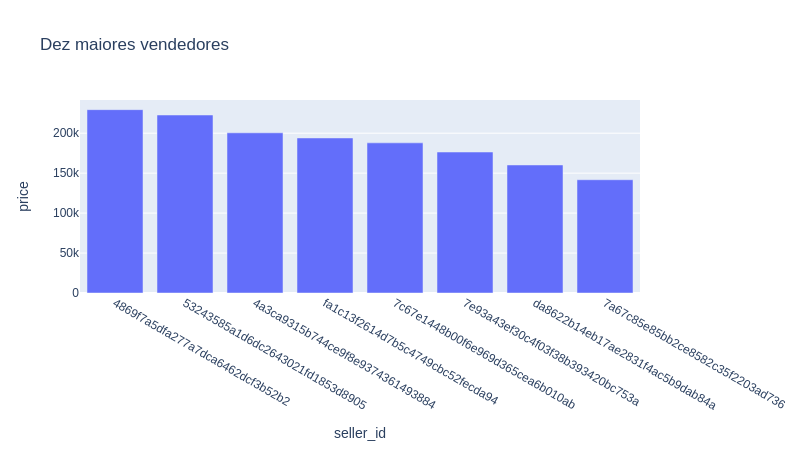

In [89]:
data = df_mais_vendas.head(8).reset_index()

fig = px.bar(data, x='seller_id', y='price', title= 'Dez maiores vendedores')
gitly.show(fig)

In [90]:
# Preço médio do frete das compras
print(f'Preço médio de todas as compras: R${df_compra_itens.freight_value.mean():.2f}')

Preço médio de todas as compras: R$19.99


In [91]:
# Preço médio total das compras (preço do produto + frete)
preço_total = df_compra_itens.price + df_compra_itens.freight_value
print(f'Preço médio total da compra: R${preço_total.mean():.2f}')

Preço médio total da compra: R$140.64


# Exploração dataset Produtos

In [92]:
# Tamanho do dataset
df_produtos.shape

(32951, 9)

In [93]:
df_produtos.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
